# На табличной задачи из sklern для random forest
## Построить графики зависимости:
1) Метрики качества классификации от кол-во деревьев. 
2) Качество обучения от глубины деревьев



In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_diabetes,load_linnerud,load_iris,load_breast_cancer
from numpy import argmax
import matplotlib.pyplot as plt

### Загрузка табличного сета. 
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification dataset.

|   |   |
|---|---|
| Classes  |  2 |  
|  Samples total | 569  |   
|  Dimensionality | 30  |   

In [30]:
X, Y = load_breast_cancer(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
def get_score(max_depth = None, n_estimators = 50):
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators = n_estimators, random_state=0)
    clf.fit(X_train, Y_train)
    return clf.score(X_test, Y_test)

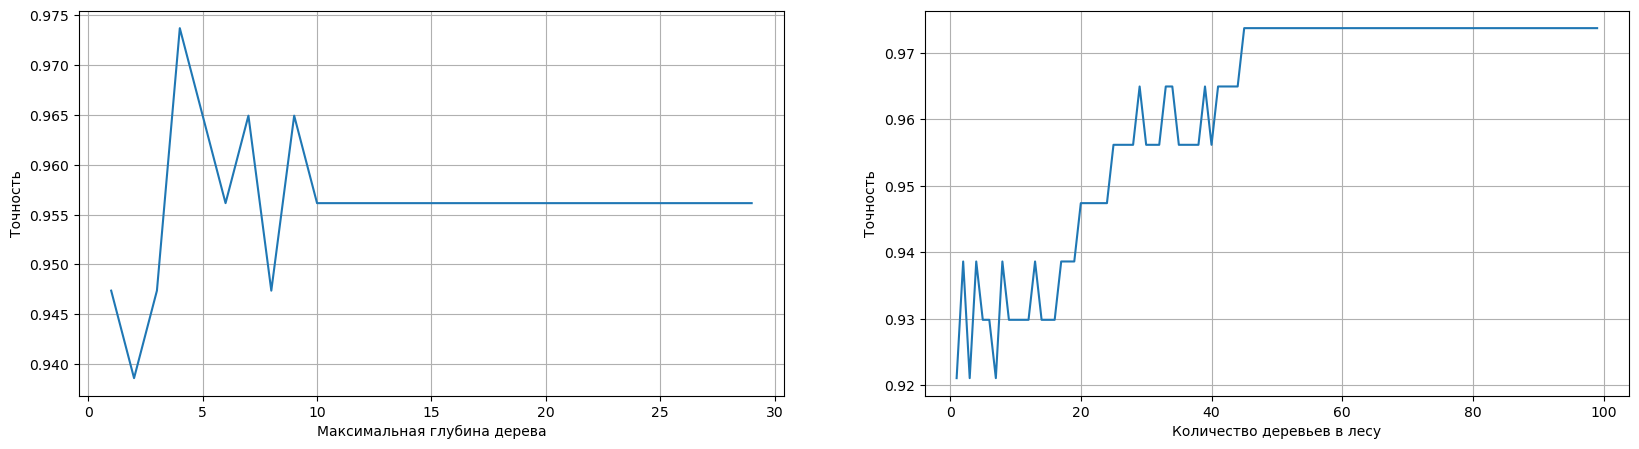

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

y_max_depth = []
y_n_estimators = []
for max_depth in range(1,30):
    y_max_depth.append(get_score(max_depth))
axs[0].plot(range(1,30), y_max_depth)
axs[0].set_ylabel("Точность")
axs[0].set_xlabel("Максимальная глубина дерева")
axs[0].grid(True)
max_depth = argmax(y_max_depth) + 1

for n_estimators in range(1,100):
    y_n_estimators.append(get_score(max_depth, n_estimators))
axs[1].plot(range(1,100), y_n_estimators)
axs[1].set_ylabel("Точность")
axs[1].set_xlabel("Количество деревьев в лесу")
axs[1].grid(True)
n_estimators = argmax(y_n_estimators) + 1

plt.show()